In [60]:
## project 1 
## Lawrence Liu 


In [61]:
## need to import the necessary libraries

import pandas as pd # data frame to store the data

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train_test_split is used to split the data into a train and test set
from sklearn.metrics import mean_squared_error, r2_score # for evaluation metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor


import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting pairs plot

import numpy as np # many mathematical operations and more, used for sqrt()

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [62]:
## load the data
df = pd.read_csv('ToyotaCorolla.csv')
df.shape

(1436, 39)

In [63]:
## see how many unique Models there are in the data set
len(df['Model'].unique())


319

In [64]:
## see how many unique Colors there are in the data set
len(df['Color'].unique())


10

In [65]:
## data preprocessing steps 

df.dropna(inplace = True) # this drops any missing values in the data set 
df['Fuel_Type'] = pd.Categorical(df['Fuel_Type'])
df = pd.get_dummies(df, columns = ['Fuel_Type'], drop_first = True)
## Due to the extensive amount of models and colors , this variables were left as objects

# df['Model'] = pd.Categorical(df["Model"])
# df = pd.get_dummies(df , columns= ['Model'], drop_first = True)
# df['Color'] = pd.Categorical(df["Color"])
# df = pd.get_dummies(df , columns= ['Color'], drop_first = True)
x = df.dtypes
with pd.option_context('display.max_rows', None):
    print(x)


Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim          int64
Radio_cassette      

In [66]:
## after feature analysis , columns that were once that were objects have been coverted to categorical (they are now boolean columns)
## since booleans are T/F values , convert them to integers 1/0. 
## to do this , we can loop through the boolean columsns and convert them to integers
for col in df.select_dtypes(['bool']).columns:
    df[col] = df[col].astype(int)

In [67]:
## check the data types again (need to increase the context with pd.option_context to see all the rows)
x = df.dtypes
with pd.option_context('display.max_rows', None):
    print(x)

## confirm that Fuel_Type has been converted to Diesel and Petrol , note that CNG was dropped (one row must be dropped)

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim          int64
Radio_cassette      

In [68]:
## check the df shape 
print(df.shape)

(1436, 40)


In [69]:
## Create training and testing datasets 
## Ensure that a 60% training dataset and 40% testing dataset is created
train_data , test_data = train_test_split ( df, test_size= 0.4 , random_state = 13)
## visualize summary statistics of the training dataset 
train_data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,...,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,731.470383,10687.421603,56.182346,5.570267,1999.603949,67881.764228,101.469222,0.672474,0.054588,1562.844367,...,0.139373,0.274100,0.285714,0.774681,0.227642,0.139373,0.003484,0.275261,0.101045,0.885017
std,415.756610,3447.922914,18.385990,3.345771,1.524965,37522.968216,14.710558,0.469584,0.227306,183.278829,...,0.346536,0.446319,0.452017,0.418035,0.419554,0.346536,0.058959,0.446905,0.301564,0.319186
min,2.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,371.000000,8500.000000,44.000000,3.000000,1998.000000,41710.000000,90.000000,0.000000,0.000000,1400.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,740.000000,9950.000000,61.000000,5.000000,1999.000000,62285.000000,110.000000,1.000000,0.000000,1600.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1083.000000,11900.000000,70.000000,8.000000,2001.000000,85389.000000,110.000000,1.000000,0.000000,1600.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1441.000000,31275.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
train_data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Parking_Assistant', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [71]:
## lets visualize the data

first_test_features = [ 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Parking_Assistant', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']

len(first_test_features) 
## checks out since removed , price , color , model , and ID

36

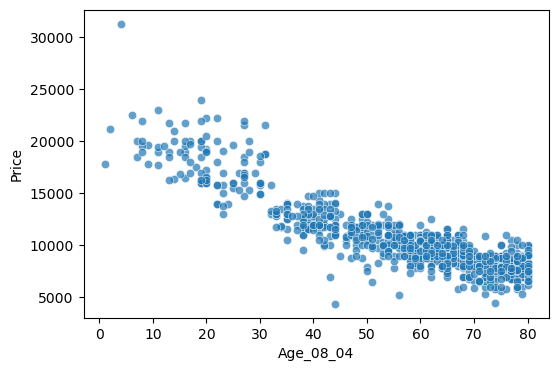

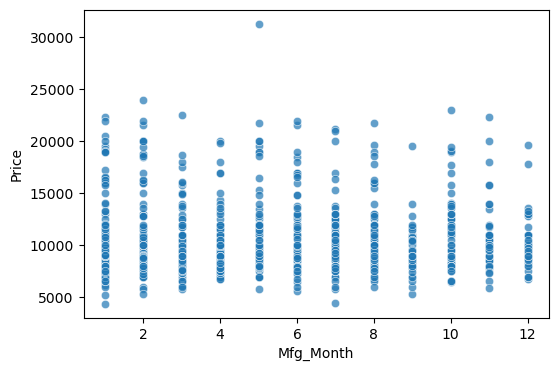

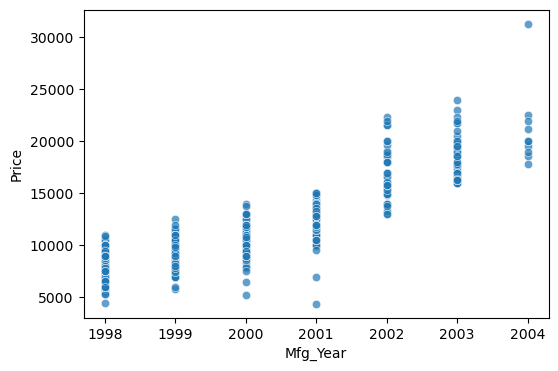

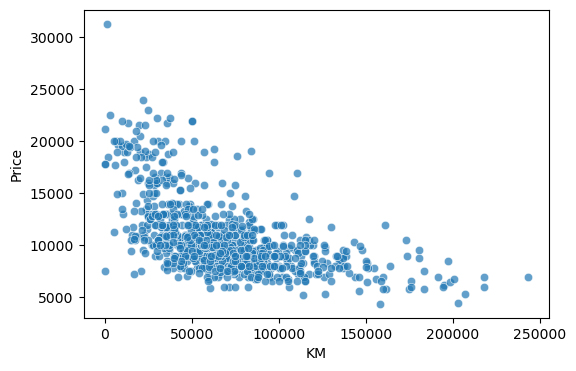

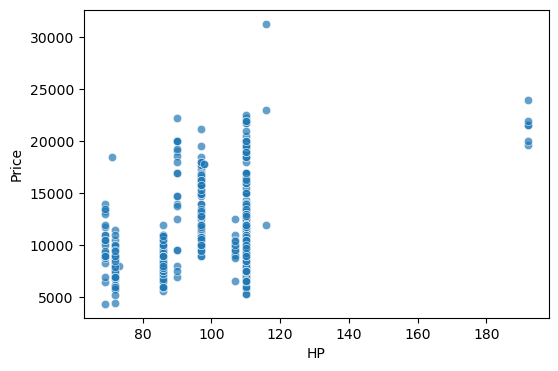

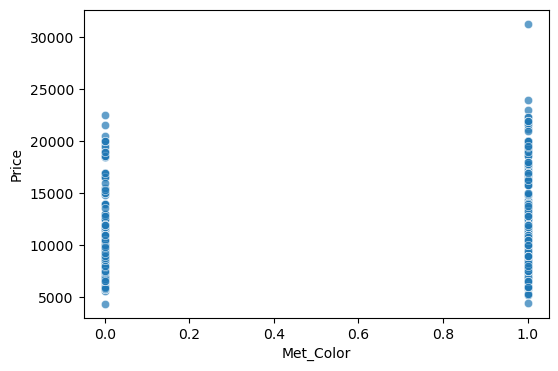

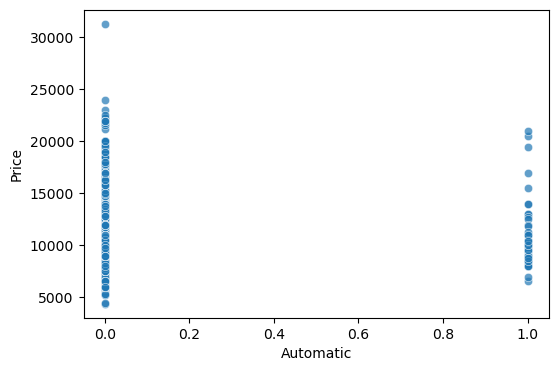

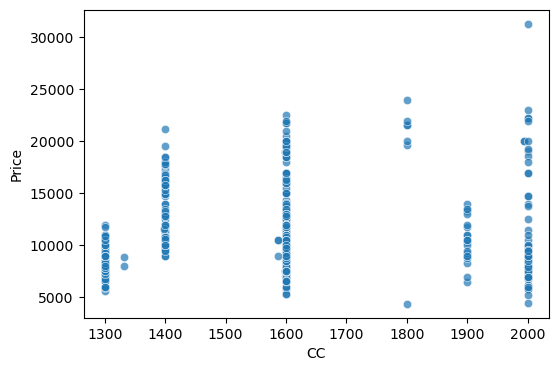

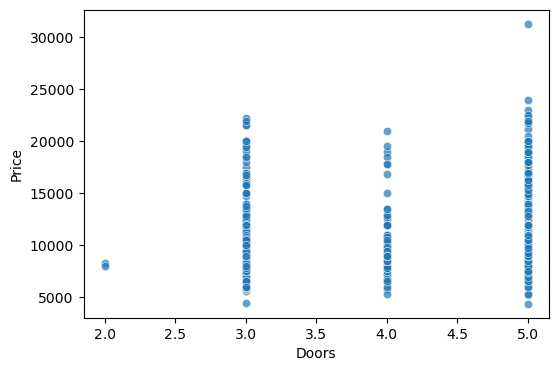

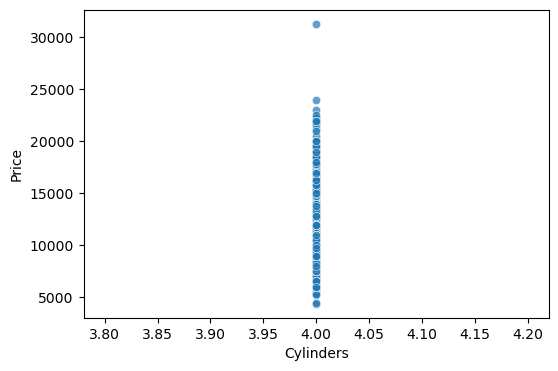

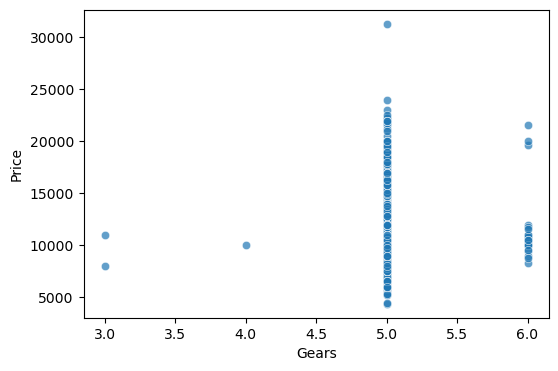

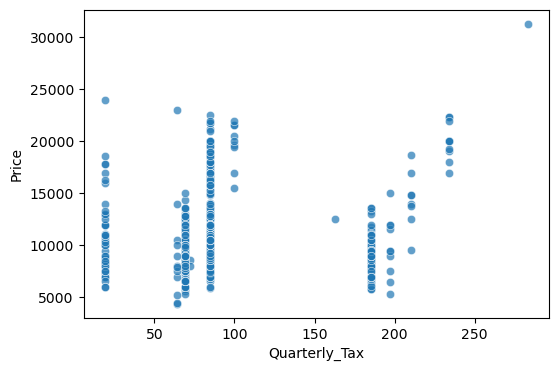

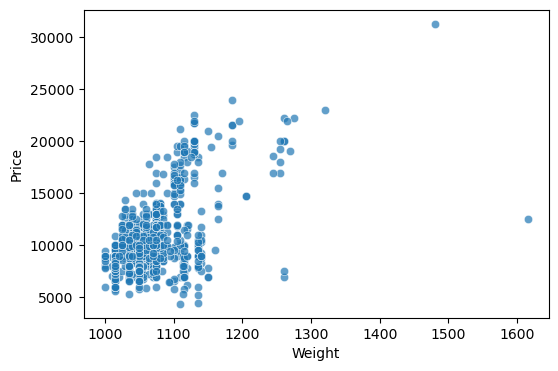

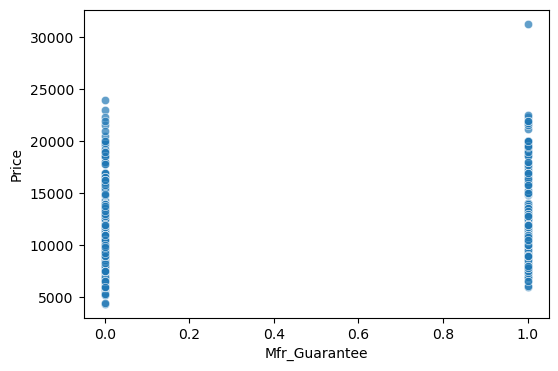

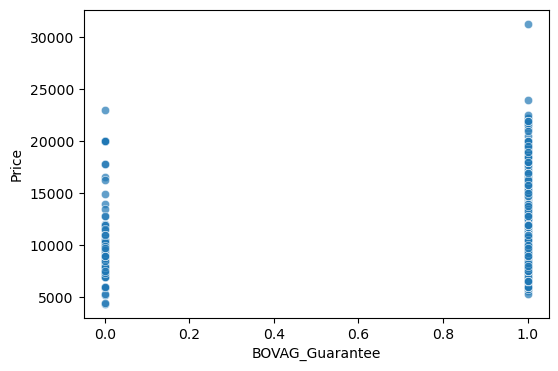

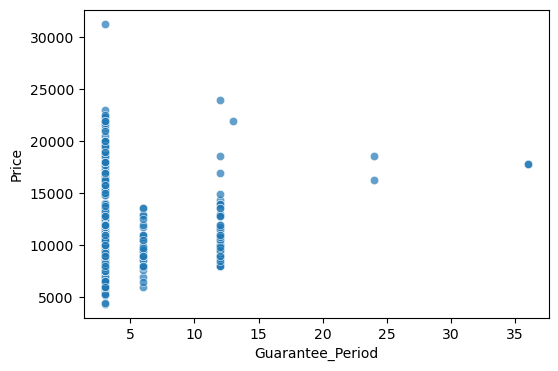

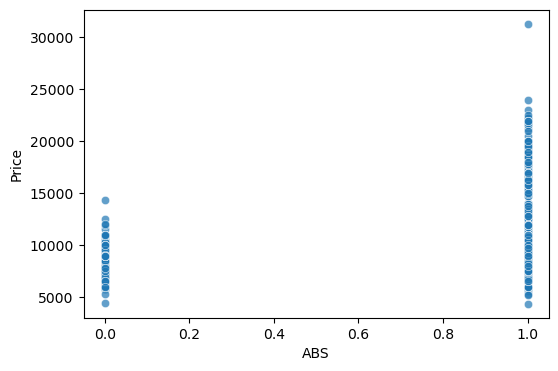

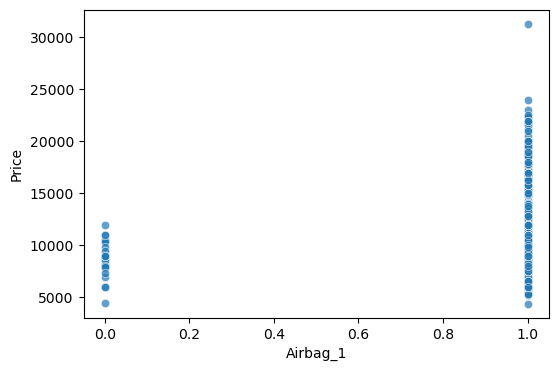

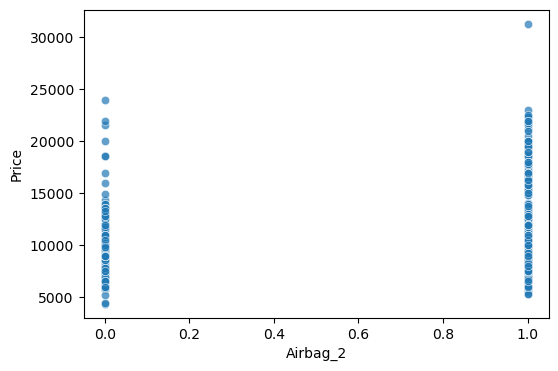

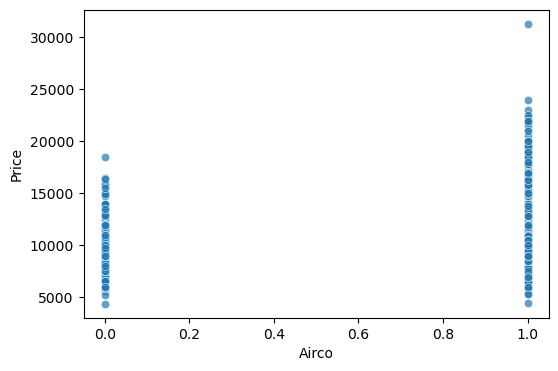

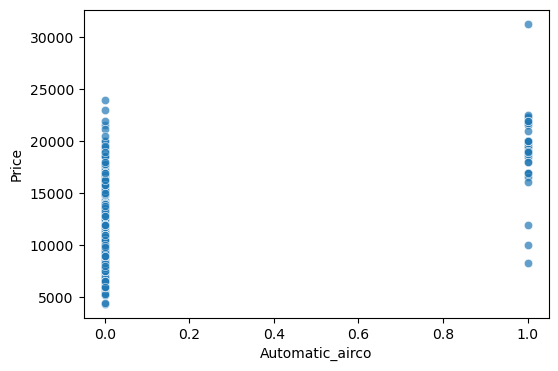

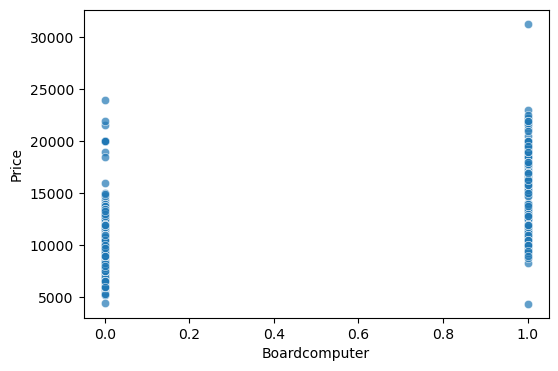

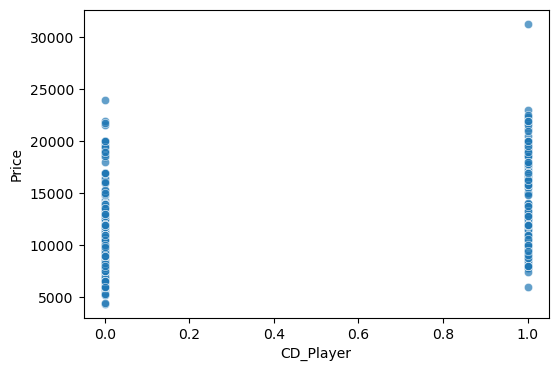

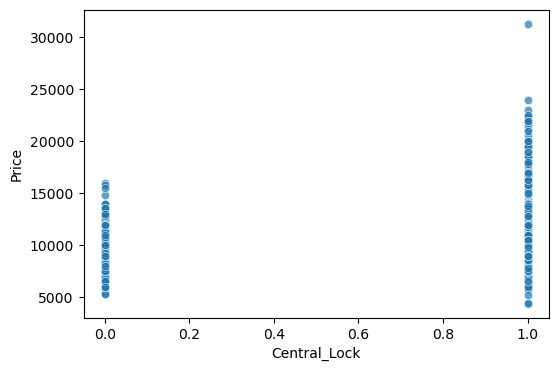

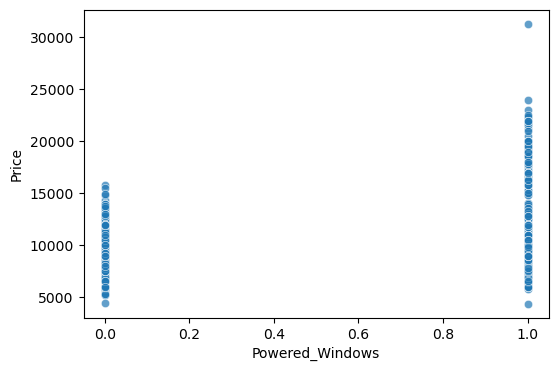

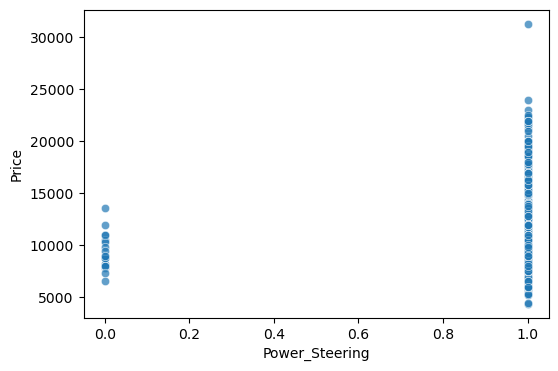

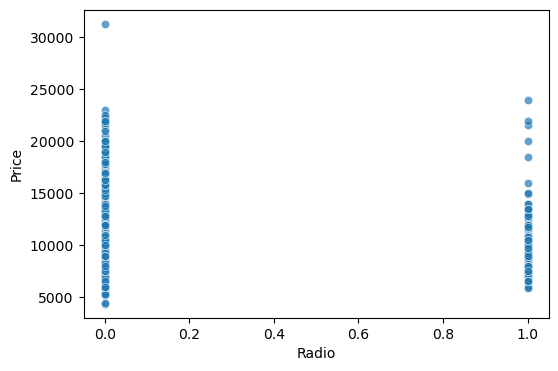

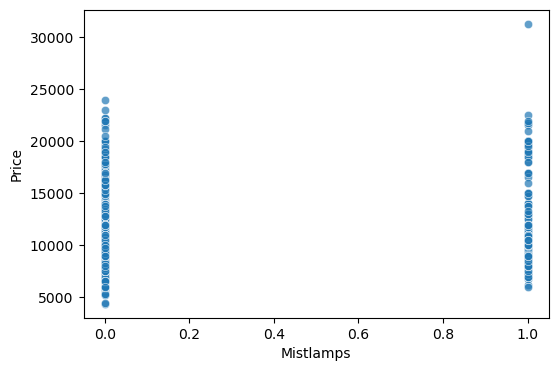

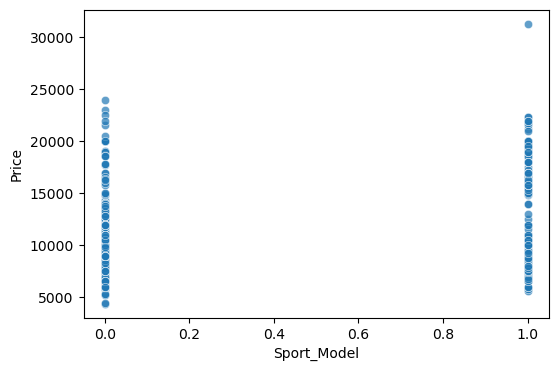

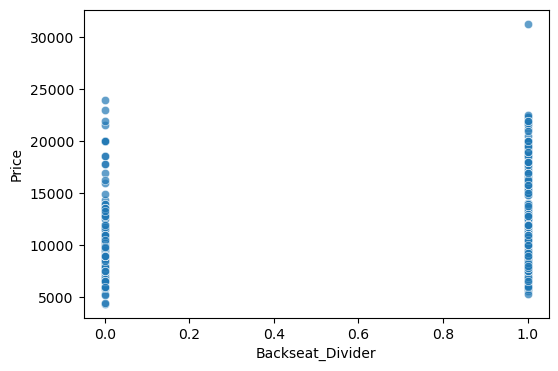

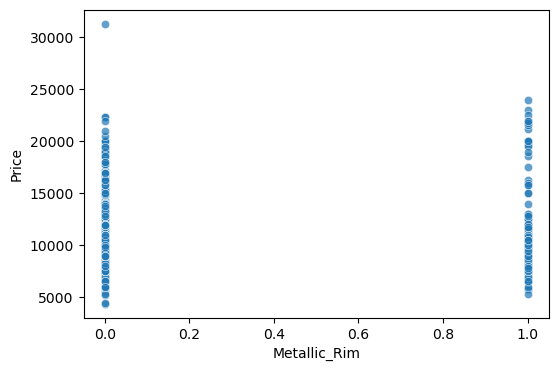

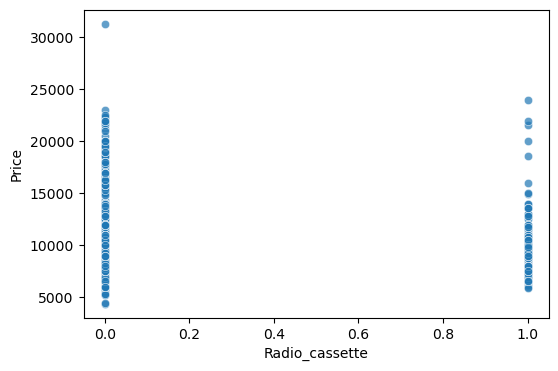

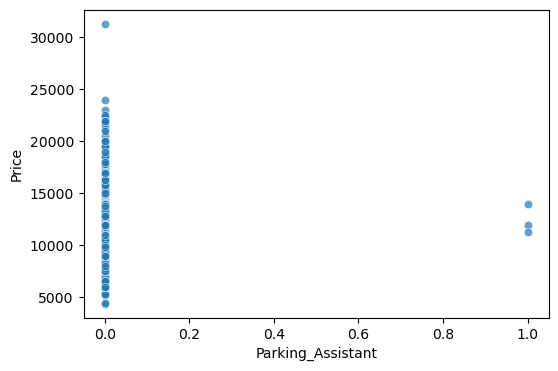

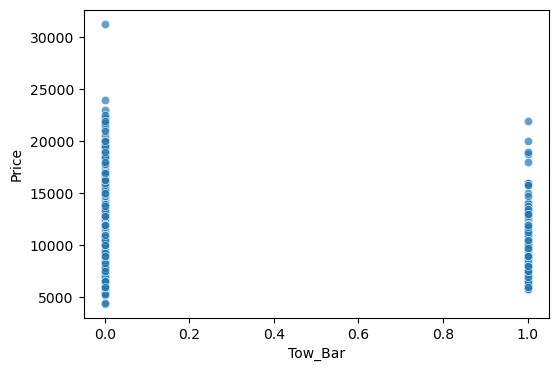

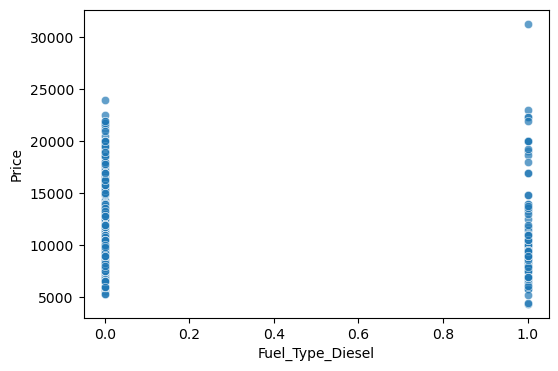

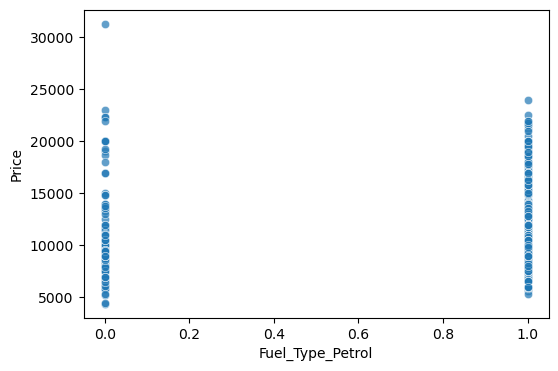

In [72]:
## create scatter plots to visualize the data
for i in first_test_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x = train_data[i], y = train_data['Price'], alpha=0.7)
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

## based on this it was determined that linearly the best variables to test are Age_08_04, Mfg_Year 
## influential variables in HP, CC, Guarentee Period 
## relationship of KM looks like 1/x 

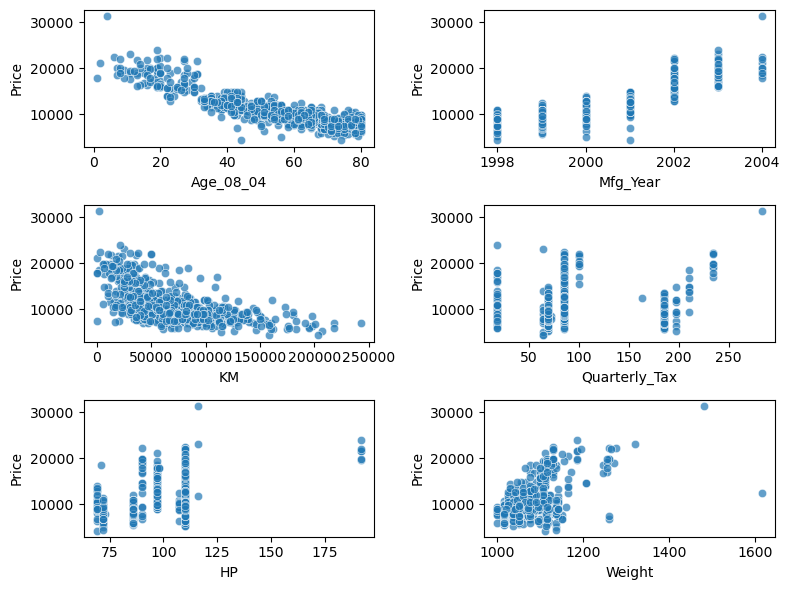

In [73]:
features_6 = ['Age_08_04', 'Mfg_Year', 'KM', 'Quarterly_Tax' , 'HP' ,'Weight']
fig, axes = plt.subplots(3, 2, figsize=(8, 6))
axes = axes.flatten()

for i in range(6):
    sns.scatterplot(x = train_data[features_6[i]], y = train_data['Price'], alpha=0.7, ax=axes[i])
    axes[i].set_xlabel(features_6[i])
    axes[i].set_ylabel('Price')
plt.tight_layout()
plt.show()


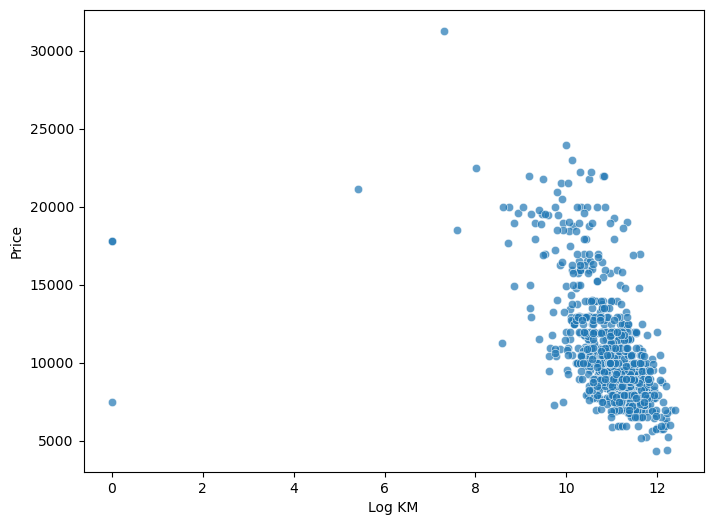

In [74]:
train_data['log_KM'] = np.log(train_data['KM'].replace(0,1))
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_data['log_KM'], y= train_data['Price'], alpha = 0.7)
plt.xlabel('Log KM')
plt.ylabel('Price')
plt.show()

## not the best approximatation

In [75]:
## Test the Multicolinearity via a VIF and residual plots 

# -------------------------------------------------------------------
# Helper function for VIF
# -------------------------------------------------------------------

# This function takes your fitted model as input
# It iterates across all variables
# And it produces a pandas data frame of VIFs for each variable
def vif_table(model):
    X = model.model.exog
    names = model.model.exog_names
    vif_values = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return pd.DataFrame({"variable": names, "VIF": vif_values})

In [76]:
## create the prediction set that is needed for the 
predictors = ['Age_08_04', 'KM', 'CC', 'Fuel_Type_Petrol' , 'Fuel_Type_Diesel', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
               'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

X_train = train_data[predictors].copy()
y_train = train_data['Price'].copy()
X_test = test_data[predictors].copy()
y_test = test_data['Price'].copy()

X_train

,Age_08_04,KM,CC,Fuel_Type_Petrol,Fuel_Type_Diesel,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
1010,60,36943,1600,1,0,110,0,5,85,1,3,0,0,0,0,1,1
224,35,71200,1600,1,0,110,0,5,85,0,3,1,0,1,1,0,0
138,11,25000,2000,0,1,116,0,5,64,0,3,1,0,1,1,0,0
728,59,86871,1300,1,0,86,0,5,69,0,3,1,0,0,1,0,0
724,62,88000,1300,1,0,86,0,3,69,0,3,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,58,63870,2000,0,1,72,0,5,185,0,3,0,0,0,0,0,0
742,58,82254,1600,1,0,110,0,5,69,0,12,0,0,0,1,0,1
74,28,28000,1600,1,0,110,0,5,85,1,3,1,1,1,1,0,0
176,8,7000,1600,1,0,110,0,5,85,0,3,1,0,0,1,1,0


In [77]:
## Goal Create a multiple linear regression with price as the outcome variable 
## run the muliple linear regression model 

model_multiple_reg_v1 = LinearRegression().fit(X_train , y_train)
## want to create a table of coefficients for each predictor variable 
coef_table = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train.columns),
    "Coefficient": [model_multiple_reg_v1.intercept_] + list(model_multiple_reg_v1.coef_)
})

coef_table

,Variable,Coefficient
0,Intercept,12381.172001
1,Age_08_04,-109.915822
2,KM,-0.016060
3,CC,-3.928032
4,Fuel_Type_Petrol,1257.033905
5,Fuel_Type_Diesel,4757.504389
6,HP,72.619253
7,Automatic,731.550976
8,Doors,201.392087
9,Quarterly_Tax,10.402862


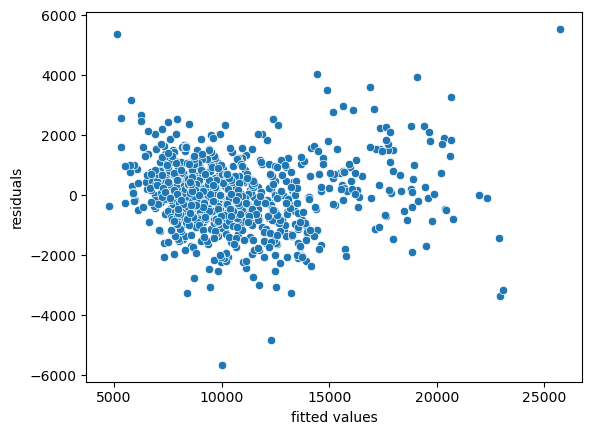

In [78]:
## need to check for obvious model misspecifications by plotting residuals 
## first need to create the residuals 
y_pred_v1 = model_multiple_reg_v1.predict(X_train)
residuals = y_train - y_pred_v1


## plot the residuals to test if there are obvious model misspecifications 
sns.scatterplot(x=y_pred_v1, y = residuals)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [79]:
## check the three or four most important car specifications for predicting the car's price 
## fit OLS model with statsmodel to get p-values 
model_best_four_v1 = sm.OLS(y_train , sm.add_constant(X_train)).fit()

## update the coef_table to include p-values from the OLS model 
coef_table['p-Value']= model_best_four_v1.pvalues.values
## now that we have updated the coef_table with the p-values we need to remove index 0 containing the intercept
top_four_v1 = coef_table.drop(index = 0)
## now that the intercept is removed we can sort the table by p values in ascending order to get the 3 to 4 more important values 
top_four_v1 = top_four_v1.sort_values(by = 'p-Value' , ascending=True).head(4)
top_four_v1

,Variable,Coefficient,p-Value
1,Age_08_04,-109.915822,3.123062e-149
13,Automatic_airco,2583.024164,1.125996e-30
6,HP,72.619253,1.307503e-26
2,KM,-0.016060,8.053725e-25


In [80]:
## based on the p-Values of the model specified by the multiple regression, the most influential variables are the Age_08_04, Automatic_airco,
## KM , and Quartlery_Tax variables 

## after referenceing the scatter plots earlier, it can be confirmed that Age_08_04 and KM makes sense (possible negative linear relationship)
## Automatic Air_co was a a Y/N (0/1) not plotted 
## Quarterly_Tax was not a good varialbe per the scatter plots 

## VIF testing will be done to test the presence of multicollinearity

In [81]:
## first step is to show the OLS regression Summary
vif_testing = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(vif_testing.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     400.1
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:28:58   Log-Likelihood:                -7285.4
No. Observations:                 861   AIC:                         1.461e+04
Df Residuals:                     843   BIC:                         1.469e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.238e+04    745.519  

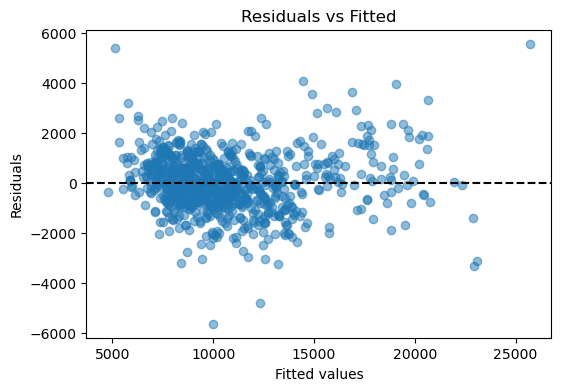

In [82]:
## per summary table: there is a possible indcation that there is a strong multicolinearity or other numerical problems 
# -------------------------------------------------------------------
# Diagnostic plots
# -------------------------------------------------------------------
# Rough analog to plot(f1) – residuals vs fitted and QQ-plot
plt.figure(figsize=(6, 4))
plt.scatter(vif_testing.fittedvalues, vif_testing.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

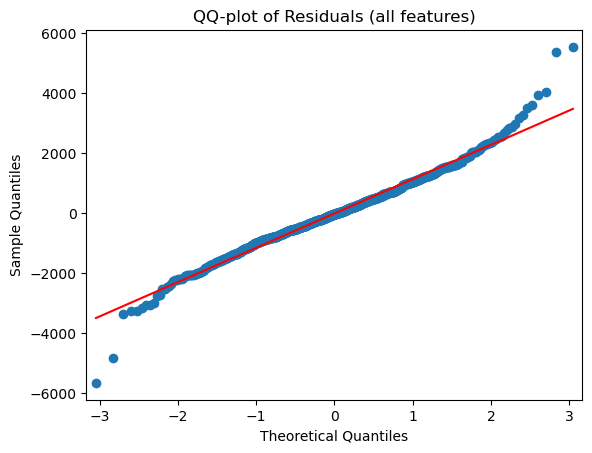


VIF for full model (all features):
            variable         VIF
0              const  357.811437
1          Age_08_04    2.526193
2                 KM    2.069684
3                 CC    9.518923
4   Fuel_Type_Petrol   10.337451
5   Fuel_Type_Diesel   19.540438
6                 HP    6.008257
7          Automatic    1.035104
8              Doors    1.181368
9      Quarterly_Tax    3.752204
10     Mfr_Guarantee    1.110627
11  Guarantee_Period    1.160008
12             Airco    1.615196
13   Automatic_airco    1.324632
14         CD_Player    1.341528
15   Powered_Windows    1.431242
16       Sport_Model    1.179377
17           Tow_Bar    1.097484


In [83]:
# QQ plot to assess normality
sm.qqplot(vif_testing.resid, line="s")
plt.title("QQ-plot of Residuals (all features)")
plt.show()

# VIF for full model
print("\nVIF for full model (all features):")
print(vif_table(vif_testing))

In [84]:
## per VIF table , Variables that are suspect : Fuel_Type_Petrol and Fuel_Type_Diesel , CC , HP 
## let us test the model after removing these 
predictors_test = ['Age_08_04', 'KM', 'Automatic', 'Doors', 'Quarterly_Tax','Mfr_Guarantee', 'Guarantee_Period', 
                   'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

X_train_v2 = train_data[predictors_test].copy()
y_train_v2 = train_data['Price'].copy()
X_test_v2 = test_data[predictors_test].copy()
y_test_v2 = test_data['Price'].copy()

X_train_v2

,Age_08_04,KM,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
1010,60,36943,0,5,85,1,3,0,0,0,0,1,1
224,35,71200,0,5,85,0,3,1,0,1,1,0,0
138,11,25000,0,5,64,0,3,1,0,1,1,0,0
728,59,86871,0,5,69,0,3,1,0,0,1,0,0
724,62,88000,0,3,69,0,3,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,58,63870,0,5,185,0,3,0,0,0,0,0,0
742,58,82254,0,5,69,0,12,0,0,0,1,0,1
74,28,28000,0,5,85,1,3,1,1,1,1,0,0
176,8,7000,0,5,85,0,3,1,0,0,1,1,0


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     424.1
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:28:58   Log-Likelihood:                -7366.5
No. Observations:                 861   AIC:                         1.476e+04
Df Residuals:                     847   BIC:                         1.483e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.545e+04    349.484  

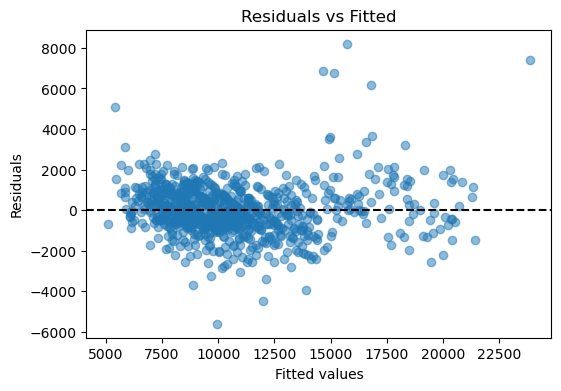

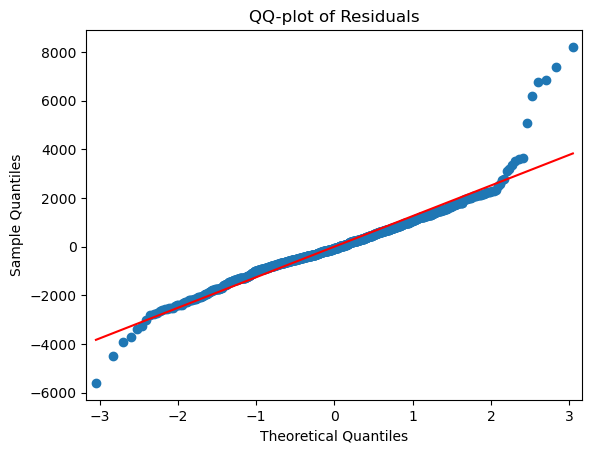


VIF for full model after removing problematic variables
            variable        VIF
0              const  65.424680
1          Age_08_04   2.405871
2                 KM   1.810636
3          Automatic   1.024762
4              Doors   1.133831
5      Quarterly_Tax   1.401337
6      Mfr_Guarantee   1.083567
7   Guarantee_Period   1.132850
8              Airco   1.537453
9    Automatic_airco   1.272858
10         CD_Player   1.332967
11   Powered_Windows   1.387273
12       Sport_Model   1.137526
13           Tow_Bar   1.069880


In [85]:
model_multiple_reg_v2 = LinearRegression().fit(X_train_v2 , y_train_v2)

## want to create a table of coefficients for each predictor variable 
coef_table_v2 = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train_v2.columns),
    "Coefficient": [model_multiple_reg_v2.intercept_] + list(model_multiple_reg_v2.coef_)
})

coef_table_v2

vif_testing_v2 = sm.OLS(y_train_v2, sm.add_constant(X_train_v2)).fit()
print(vif_testing_v2.summary())
plt.figure(figsize=(6, 4))
plt.scatter(vif_testing_v2.fittedvalues, vif_testing_v2.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()
# QQ plot to assess normality
sm.qqplot(vif_testing_v2.resid, line="s")
plt.title("QQ-plot of Residuals")
plt.show()

# VIF for full model
print("\nVIF for full model after removing problematic variables")
print(vif_table(vif_testing_v2))

In [86]:
## let us train the model using the top variables based on the lowest P-Value 
## create prediction set 
predictors_best_four = ['Age_08_04' , 'Automatic_airco' , 'KM' ,'Quarterly_Tax']
# subset the new train and test data sets
X_train_b4 = train_data[predictors_best_four].copy()
y_train_b4 = train_data['Price'].copy()
X_test_b4 = test_data[predictors_best_four].copy()
y_test_b4 = test_data['Price'].copy()

## create regression model , then create the coef table
model_multiple_reg_b4 = LinearRegression().fit(X_train_b4 , y_train_b4)

## want to create a table of coefficients for each predictor variable 
coef_table_b4 = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train_b4.columns),
    "Coefficient": [model_multiple_reg_b4.intercept_] + list(model_multiple_reg_b4.coef_)
})

coef_table_b4


,Variable,Coefficient
0,Intercept,18257.718789
1,Age_08_04,-128.375948
2,Automatic_airco,3405.898926
3,KM,-0.018255
4,Quarterly_Tax,8.406735


In [87]:
## check against the test set. 
model_multiple_reg_b4test = LinearRegression().fit(X_test_b4 , y_test_b4)
model_ols_b4train = sm.OLS(y_train_b4 , sm.add_constant(X_train_b4)).fit()
model_ols_b4test = sm.OLS(y_test_b4 , sm.add_constant(X_test_b4)).fit()
## create table that shows the coefficients and P values compare against the test and train sets
my_comp_coef_table = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train_b4.columns),
    "Coefficient_Train": [model_multiple_reg_b4.intercept_] + list(model_multiple_reg_b4.coef_),
    "Coefficient_Test": [model_multiple_reg_b4test.intercept_] + list(model_multiple_reg_b4test.coef_),
    "p-Value_Train": model_ols_b4train.pvalues.values,
    "p-Value_Test": model_ols_b4test.pvalues.values
})
my_comp_coef_table


,Variable,Coefficient_Train,Coefficient_Test,p-Value_Train,p-Value_Test
0,Intercept,18257.718789,17551.956453,0.000000e+00,2.533185e-263
1,Age_08_04,-128.375948,-118.251566,6.772233e-191,6.874721e-109
2,Automatic_airco,3405.898926,4304.114579,7.478436e-41,4.340340e-51
3,KM,-0.018255,-0.025021,1.237797e-27,2.932819e-31
4,Quarterly_Tax,8.406735,14.083845,4.218405e-10,4.012185e-18


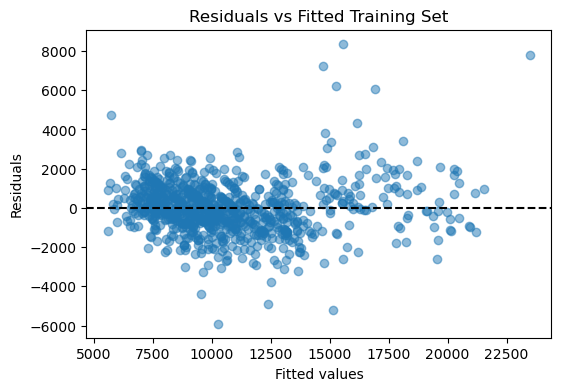

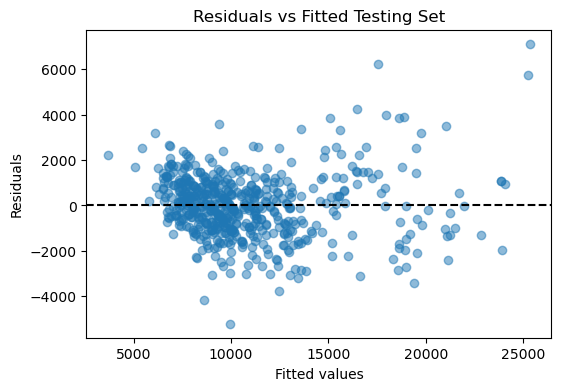

In [88]:
## check the residuals of the 

plt.figure(figsize=(6, 4))
plt.scatter(model_ols_b4train.fittedvalues, model_ols_b4train.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Training Set")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(model_ols_b4test.fittedvalues, model_ols_b4test.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Testing Set")
plt.show()

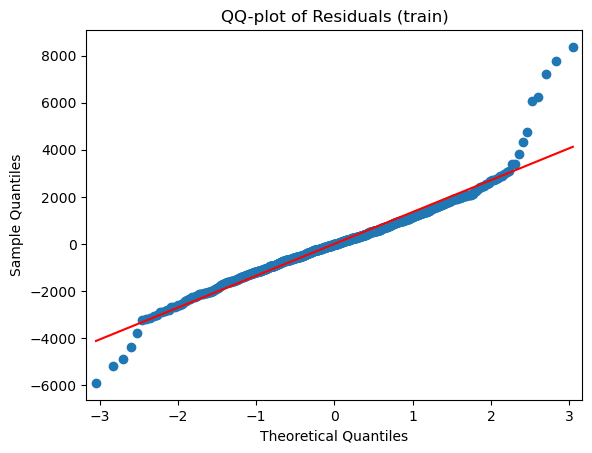

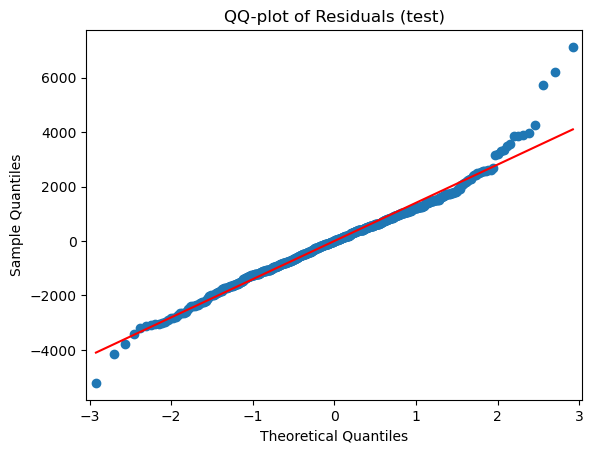


Breusch–Pagan test for heteroskedasticity (train set):
{'LM stat': np.float64(43.04021272114257), 'LM p-value': np.float64(1.015095716055095e-08), 'F stat': np.float64(11.260462513647312), 'F p-value': np.float64(6.577803214953764e-09)}

Breusch–Pagan test for heteroskedasticity (test set):
{'LM stat': np.float64(78.54536060475475), 'LM p-value': np.float64(3.5408064660453836e-16), 'F stat': np.float64(22.545290139320528), 'F p-value': np.float64(2.6403096151346893e-17)}


In [89]:


## additionally let us explore possible heteroscedasticity between the training and the testing set

model_ols_b4train = sm.OLS(y_train_b4 , sm.add_constant(X_train_b4)).fit()
model_ols_b4test = sm.OLS(y_test_b4 , sm.add_constant(X_test_b4)).fit()
# ---------------------------------------------------------
# Breusch–Pagan test against heteroskedasticity

sm.qqplot(model_ols_b4train.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (train)")
plt.show()
sm.qqplot(model_ols_b4test.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (test)")
plt.show()

bp_trainset = sms.het_breuschpagan(model_ols_b4train.resid, model_ols_b4train.model.exog)
bp_trainlabels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (train set):")
print(dict(zip(bp_trainlabels, bp_trainset)))

bp_testset = sms.het_breuschpagan(model_ols_b4test.resid, model_ols_b4test.model.exog)
bp_testlabels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (test set):")
print(dict(zip(bp_testlabels, bp_testset)))


In [90]:
ols_train_robust =model_ols_b4train.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: training dataset")
print(ols_train_robust.summary())


OLS with robust (HC0) standard errors: training dataset
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     686.5
Date:                Tue, 11 Nov 2025   Prob (F-statistic):          2.63e-265
Time:                        22:28:59   Log-Likelihood:                -7430.4
No. Observations:                 861   AIC:                         1.487e+04
Df Residuals:                     856   BIC:                         1.489e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [91]:
ols_test_robust =model_ols_b4test.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: testing dataset")
print(ols_test_robust.summary())


OLS with robust (HC0) standard errors: testing dataset
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     483.3
Date:                Tue, 11 Nov 2025   Prob (F-statistic):          1.59e-181
Time:                        22:28:59   Log-Likelihood:                -4982.8
No. Observations:                 575   AIC:                             9976.
Df Residuals:                     570   BIC:                             9997.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [92]:
## there seems to be a few outliers in the train and test set. To confirm the outliers we can use Cooks D with the cutoff 4/n (where n is the number of observations)
influence_train = model_ols_b4train.get_influence()
## Cooks Distance is the first value of the output 
df_cook_train = pd.DataFrame({'CookD': influence_train.cooks_distance[0]} , index = X_train_b4.index)
## create a cutoff threshold 
cutoff_train = 4 / len(X_train_b4)

outliers_train = df_cook_train[df_cook_train['CookD'] > cutoff_train]

cleaned_X_train_b4 = X_train_b4.drop(outliers_train.index)
cleaned_y_train_b4 = y_train_b4.drop(outliers_train.index)


In [93]:
## there seems to be a few outliers in the train and test set. To confirm the outliers we can use Cooks D with the cutoff 4/n (where n is the number of observations)
influence_test = model_ols_b4test.get_influence()
## Cooks Distance is the first value of the output 
df_cook_test = pd.DataFrame({'CookD': influence_test.cooks_distance[0]} , index = X_test_b4.index)
## create a cutoff threshold 
cutoff_test = 4 / len(X_test_b4)

outliers_test = df_cook_test[df_cook_test['CookD'] > cutoff_test]

cleaned_X_test_b4 = X_test_b4.drop(outliers_test.index)
cleaned_y_test_b4 = y_test_b4.drop(outliers_test.index)

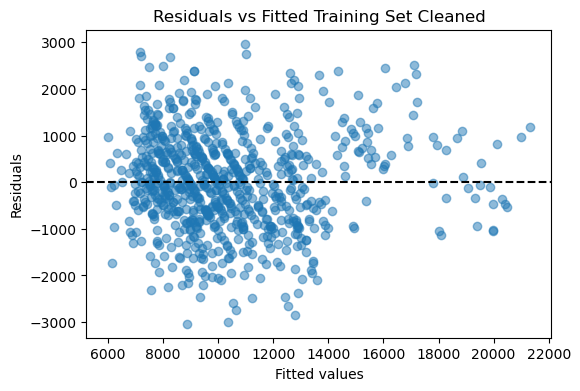

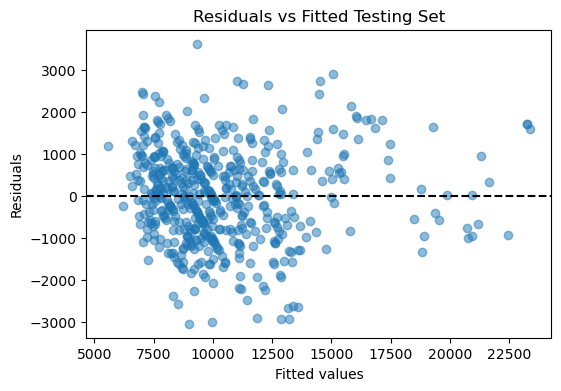

In [94]:
## plot the new ones to show the difference and or if there is an improvement
cleaned_model_multiple_reg_b4train = LinearRegression().fit(cleaned_X_train_b4 , cleaned_y_train_b4)
cleaned_model_multiple_reg_b4test = LinearRegression().fit(cleaned_X_test_b4 , cleaned_y_test_b4)
cleaned_model_ols_b4train = sm.OLS(cleaned_y_train_b4 , sm.add_constant(cleaned_X_train_b4)).fit()
cleaned_model_ols_b4test = sm.OLS(cleaned_y_test_b4 , sm.add_constant(cleaned_X_test_b4)).fit()

plt.figure(figsize=(6, 4))
plt.scatter(cleaned_model_ols_b4train.fittedvalues, cleaned_model_ols_b4train.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Training Set Cleaned")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(cleaned_model_ols_b4test.fittedvalues, cleaned_model_ols_b4test.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Testing Set")
plt.show()


In [95]:
print(cleaned_model_ols_b4train.summary())
print(cleaned_model_ols_b4test.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1395.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:28:59   Log-Likelihood:                -6703.5
No. Observations:                 802   AIC:                         1.342e+04
Df Residuals:                     797   BIC:                         1.344e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.783e+04    173.195    1

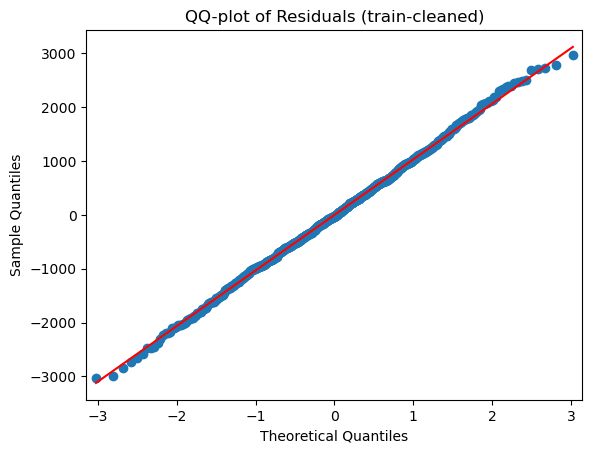

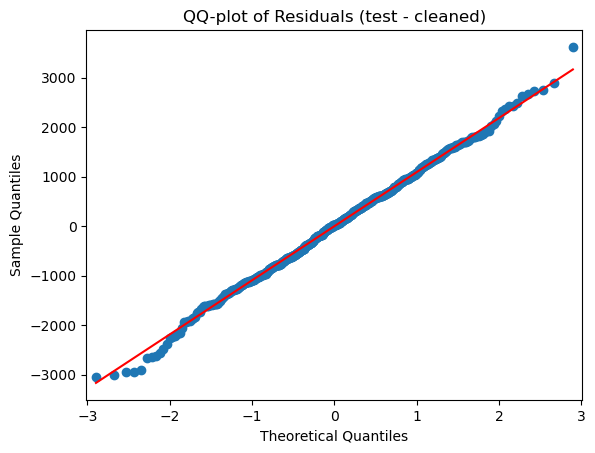


Breusch–Pagan test for heteroskedasticity (train set cleaned):
{'LM stat': np.float64(15.166856538749931), 'LM p-value': np.float64(0.0043673674286078545), 'F stat': np.float64(3.840707766899958), 'F p-value': np.float64(0.004236531206494618)}

Breusch–Pagan test for heteroskedasticity (test set cleaned):
{'LM stat': np.float64(17.69312779493803), 'LM p-value': np.float64(0.0014166769214898525), 'F stat': np.float64(4.532875019010274), 'F p-value': np.float64(0.0013147552226194144)}


In [96]:
sm.qqplot(cleaned_model_ols_b4train.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (train-cleaned)")
plt.show()
sm.qqplot(cleaned_model_ols_b4test.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (test - cleaned)")
plt.show()

cleaned_bp_trainset = sms.het_breuschpagan(cleaned_model_ols_b4train.resid, cleaned_model_ols_b4train.model.exog)
cleaned_bp_trainlabels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (train set cleaned):")
print(dict(zip(cleaned_bp_trainlabels, cleaned_bp_trainset)))

cleaned_bp_testset = sms.het_breuschpagan(cleaned_model_ols_b4test.resid, cleaned_model_ols_b4test.model.exog)
cleaned_bp_testlabels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (test set cleaned):")
print(dict(zip(cleaned_bp_testlabels, cleaned_bp_testset)))


In [97]:
cleaned_ols_train_robust =cleaned_model_ols_b4train.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: cleaned training dataset")
print(cleaned_ols_train_robust.summary())
cleaned_ols_test_robust =cleaned_model_ols_b4test.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: cleaned testing dataset")
print(cleaned_ols_test_robust.summary())


OLS with robust (HC0) standard errors: cleaned training dataset
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1675.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:28:59   Log-Likelihood:                -6703.5
No. Observations:                 802   AIC:                         1.342e+04
Df Residuals:                     797   BIC:                         1.344e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [98]:
## it is interesting to note that R^2 increased by 0.01 but condition number increased 

In [99]:
cleaned_my_comp_coef_table = pd.DataFrame({
    "Variable": ["Intercept"] + list(cleaned_X_train_b4.columns),
    "Coefficient_Train": [cleaned_model_multiple_reg_b4train.intercept_] + list(cleaned_model_multiple_reg_b4train.coef_),
    "Coefficient_Test": [cleaned_model_multiple_reg_b4test.intercept_] + list(cleaned_model_multiple_reg_b4test.coef_),
    "p-Value_Train": cleaned_model_ols_b4train.pvalues.values,
    "p-Value_Test": cleaned_model_ols_b4test.pvalues.values
})
cleaned_my_comp_coef_table

,Variable,Coefficient_Train,Coefficient_Test,p-Value_Train,p-Value_Test
0,Intercept,17828.401858,17268.760956,0.000000e+00,7.520549e-287
1,Age_08_04,-121.688615,-116.023662,2.475358e-217,2.044451e-130
2,Automatic_airco,3794.426469,4377.336624,2.001042e-51,4.996714e-43
3,KM,-0.015018,-0.020331,1.280515e-26,3.055593e-27
4,Quarterly_Tax,5.650259,11.933440,3.871579e-06,1.601713e-15


statsmodel robust errors
R-squared: 0.88
RMSE: 1092.78

ski-kit learn
R-squared: 0.88
RMSE: 1092.78


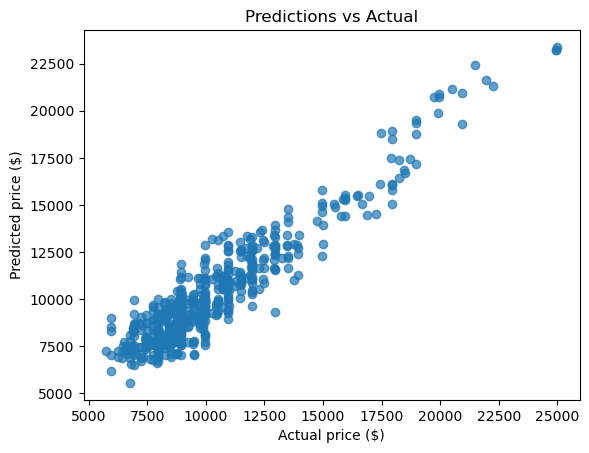

In [100]:
### Step 6: Predictions and Final Evaluation ----

# scikit-learn
cleaned_pred_b4 = cleaned_ols_test_robust.predict(sm.add_constant(cleaned_X_test_b4[predictors_best_four]))

r2_cleaned_b4 = r2_score(cleaned_y_test_b4, cleaned_pred_b4)
rmse_cleaned_b4 = np.sqrt(mean_squared_error(cleaned_y_test_b4, cleaned_pred_b4))

print("statsmodel robust errors")
print(f"R-squared: {round(r2_cleaned_b4, 2)}")
print(f"RMSE: {round(rmse_cleaned_b4, 2)}")

cleaned_pred_b4_sl = cleaned_model_multiple_reg_b4test.predict((cleaned_X_test_b4[predictors_best_four]))

r2_sm = r2_score(cleaned_y_test_b4, cleaned_pred_b4_sl)
rmse_sm = np.sqrt(mean_squared_error(cleaned_y_test_b4, cleaned_pred_b4_sl))

print("\nski-kit learn")
print(f"R-squared: {round(r2_sm, 2)}")
print(f"RMSE: {round(rmse_sm, 2)}")

# Scatter Plot of Predictions
plt.scatter(cleaned_y_test_b4, cleaned_pred_b4_sl, alpha=0.7)
plt.xlabel("Actual price ($)")
plt.ylabel("Predicted price ($)")
plt.title("Predictions vs Actual")
plt.show()


In [101]:
X_train_final = train_data[first_test_features]
y_train_final = train_data['Price']
X_test_final = test_data[first_test_features]
y_test_final= test_data['Price']

In [102]:
## need to create foward/ backwards and stepwise feature selection 

## start with forward

sfs_forward = SFS(LinearRegression(), # type of model
                  k_features=(1, 4), # will find between 1 and 4 features
                  forward=True, # search direction (backwards if False)
                  floating=False, # controls stepwise vs. one direction
                  scoring='neg_root_mean_squared_error', # find max RMSE
                  cv=5) # how many random subsets of data to test
sfs_forward = sfs_forward.fit(X_train_final, y_train_final)
best_forward_subset = sfs_forward.subsets_[1]
for v in sfs_forward.subsets_.values():
    if v['avg_score'] > best_forward_subset['avg_score']:
        best_forward_subset = v


print(f'Best score: {- best_forward_subset["avg_score"]:.2f}')
print(f'Best subset (indices): {best_forward_subset["feature_idx"]}')
print(f'Best subset (names): {best_forward_subset["feature_names"]}')


Best score: 1285.57
Best subset (indices): (2, 4, 12, 20)
Best subset (names): ('Mfg_Year', 'HP', 'Weight', 'Automatic_airco')


In [103]:
## need to create foward/ backwards and stepwise feature selection 


sfs_backward = SFS(LinearRegression(), # type of model
                  k_features=(1, 6),
                  forward=False, # search direction (backwards if False)
                  floating=False, # controls stepwise vs. one direction
                  scoring='neg_root_mean_squared_error', # find max RMSE
                  cv=5) # how many random subsets of data to test
sfs_backward = sfs_backward.fit(X_train_final, y_train_final)
best_backward_subset = sfs_backward.subsets_[4]
for v in sfs_backward.subsets_.values():
    if v['avg_score'] > best_backward_subset['avg_score']:
        best_bacward_subset = v


print(f'Best score: {- best_backward_subset["avg_score"]:.2f}')
print(f'Best subset (indices): {best_backward_subset["feature_idx"]}')
print(f'Best subset (names): {best_backward_subset["feature_names"]}')


Best score: 1303.55
Best subset (indices): (2, 3, 4, 20)
Best subset (names): ('Mfg_Year', 'KM', 'HP', 'Automatic_airco')


In [104]:
# Stepwise selection
sfs_stepwise = SFS(LinearRegression(),
            k_features=(1, 4),
            forward=True, floating=True,
            cv=5, scoring='neg_root_mean_squared_error',
            n_jobs=-1)

sfs_stepwise = sfs_stepwise.fit(X_train_final, y_train_final)

best_subset_step = sfs_stepwise.subsets_[4]
for v in sfs_stepwise.subsets_.values():
    if v['avg_score'] > best_subset_step['avg_score']:
        best_subset_step = v

print(f"Best accuracy score: {- best_subset_step['avg_score']:.2f}")
print(f"Best subset (indices): {best_subset_step['feature_idx']}")
print(f"Best subset (corresponding names):\n{best_subset_step['feature_names']}")

Best accuracy score: 1285.57
Best subset (indices): (2, 4, 12, 20)
Best subset (corresponding names):
('Mfg_Year', 'HP', 'Weight', 'Automatic_airco')


In [105]:
## lower neg root mean squared error is better, since forward and stepwise have the lowest and the same names that will be our final dataset
## steps, create the final X_train , y_train , X_test, y_test
## run VIF 
## run cooks D to remove outliers 
## run robust OLS on cleaned data set 
## show predicted vs actuals

In [106]:
final_predictors = ['Mfg_Year', 'HP', 'Weight', 'Automatic_airco']
final_X_train = train_data[final_predictors].copy()
final_y_train = train_data['Price'].copy()
final_X_test = test_data[final_predictors].copy()
final_y_test = test_data['Price'].copy()

final_X_train


,Mfg_Year,HP,Weight,Automatic_airco
1010,1999,110,1070,0
224,2001,110,1075,0
138,2003,116,1320,0
728,1999,86,1040,0
724,1999,86,1020,0
...,...,...,...,...
866,1999,72,1135,0
742,1999,110,1050,0
74,2002,110,1130,1
176,2004,110,1115,0


In [107]:
## time to set up the final stats model 
final_model_train_sm = sm.OLS(final_y_train , sm.add_constant(final_X_train)).fit()
print(final_model_train_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1372.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:29:06   Log-Likelihood:                -7372.1
No. Observations:                 861   AIC:                         1.475e+04
Df Residuals:                     856   BIC:                         1.478e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.368e+06   6.62e+04    -

In [108]:
final_model_train_skl = LinearRegression().fit(final_X_train, final_y_train)

In [109]:
final_model_train_sm_robust =final_model_train_sm.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: final training dataset")
print(final_model_train_sm_robust.summary())


OLS with robust (HC0) standard errors: final training dataset
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1014.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):          6.42e-323
Time:                        22:29:06   Log-Likelihood:                -7372.1
No. Observations:                 861   AIC:                         1.475e+04
Df Residuals:                     856   BIC:                         1.478e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

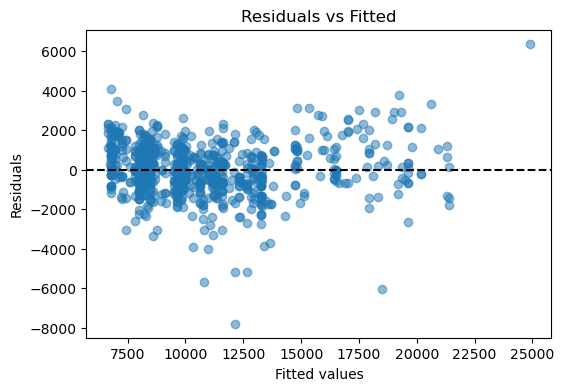

In [110]:
plt.figure(figsize=(6, 4))
plt.scatter(final_model_train_sm_robust.fittedvalues, final_model_train_sm_robust.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

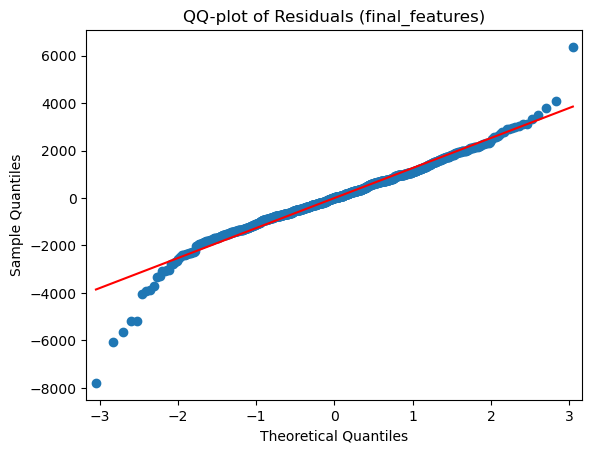


VIF for full model (final_features):
          variable           VIF
0            const  2.340695e+06
1         Mfg_Year  1.375364e+00
2               HP  1.037770e+00
3           Weight  1.329654e+00
4  Automatic_airco  1.309664e+00


In [111]:
# QQ plot to assess normality
sm.qqplot(final_model_train_sm_robust.resid, line="s")
plt.title("QQ-plot of Residuals (final_features)")
plt.show()

# VIF for full model
print("\nVIF for full model (final_features):")
print(vif_table(final_model_train_sm_robust))

In [112]:
## there seems to be a few outliers in the train and test set. To confirm the outliers we can use Cooks D with the cutoff 4/n (where n is the number of observations)
influence_final_train= final_model_train_sm_robust.get_influence()
## Cooks Distance is the first value of the output 
df_cook_train_final = pd.DataFrame({'CookD': influence_final_train.cooks_distance[0]} , index = final_X_train.index)
## create a cutoff threshold 
cutoff_train_final = 4 / len(final_X_train)

outliers_train_final = df_cook_train_final[df_cook_train_final['CookD'] > cutoff_train_final]

cleaned_final_X_train = final_X_train.drop(outliers_train_final.index)
cleaned_final_y_train = final_y_train.drop(outliers_train_final.index)

In [113]:
cleaned_model_train_sm = sm.OLS(cleaned_final_y_train, sm.add_constant(cleaned_final_X_train)).fit()
cleaned_model_train_skl = LinearRegression().fit(cleaned_final_X_train, cleaned_final_y_train)
print(cleaned_model_train_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1539.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:29:07   Log-Likelihood:                -6726.3
No. Observations:                 809   AIC:                         1.346e+04
Df Residuals:                     804   BIC:                         1.349e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.189e+06   5.49e+04    -

In [114]:
cleaned_final_model_train_sm_robust =cleaned_model_train_sm.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: cleaned final training dataset")
print(cleaned_final_model_train_sm_robust.summary())


OLS with robust (HC0) standard errors: cleaned final training dataset
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2125.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:29:07   Log-Likelihood:                -6726.3
No. Observations:                 809   AIC:                         1.346e+04
Df Residuals:                     804   BIC:                         1.349e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

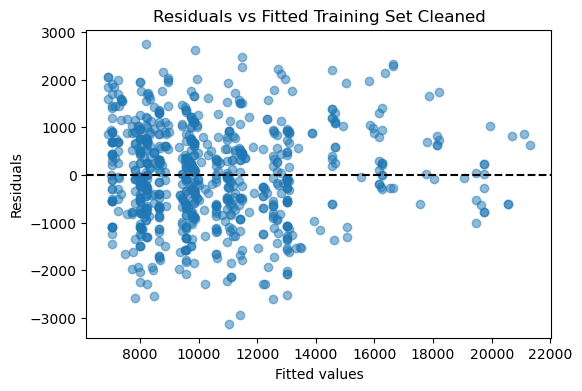

In [115]:
plt.figure(figsize=(6, 4))
plt.scatter(cleaned_model_train_sm.fittedvalues, cleaned_model_train_sm.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Training Set Cleaned")
plt.show()

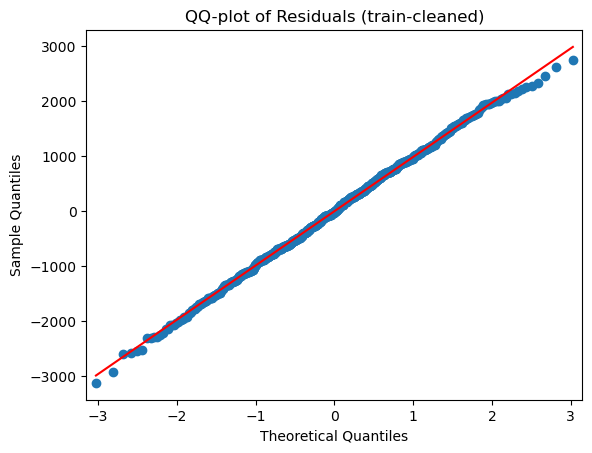

In [116]:
sm.qqplot(cleaned_model_train_sm.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (train-cleaned)")
plt.show()

In [117]:
cleaned_bp_trainset_final = sms.het_breuschpagan(cleaned_model_train_sm.resid, cleaned_model_train_sm.model.exog)
cleaned_bp_trainlabels_final = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (train set cleaned):")
print(dict(zip(cleaned_bp_trainlabels_final, cleaned_bp_trainset_final)))


Breusch–Pagan test for heteroskedasticity (train set cleaned):
{'LM stat': np.float64(12.265561368804358), 'LM p-value': np.float64(0.015481964267687855), 'F stat': np.float64(3.0943532946376), 'F p-value': np.float64(0.015265193330801329)}


sklearn
R-squared: 0.87
RMSE: 1407.16

statsmodels
R-squared: 0.87
RMSE: 1407.16


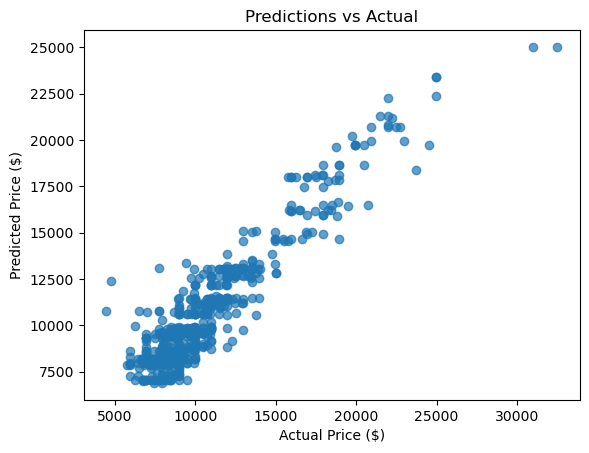

In [118]:
### Step 6: Predictions and Final Evaluation ----

# scikit-learn
final_pred_skl = cleaned_model_train_skl.predict(final_X_test)

final_r2_skl = r2_score(final_y_test, final_pred_skl)
final_rmse_skl = np.sqrt(mean_squared_error(final_y_test, final_pred_skl))

print("sklearn")
print(f"R-squared: {round(final_r2_skl, 2)}")
print(f"RMSE: {round(final_rmse_skl, 2)}")

# statsmodels
final_pred_sm = cleaned_final_model_train_sm_robust.predict(sm.add_constant(final_X_test))

final_r2_sm = r2_score(final_y_test, final_pred_sm)
final_rmse_sm = np.sqrt(mean_squared_error(final_y_test, final_pred_sm))

print("\nstatsmodels")
print(f"R-squared: {round(final_r2_sm, 2)}")
print(f"RMSE: {round(final_rmse_sm, 2)}")

# Scatter Plot of Predictions
plt.scatter(final_y_test, final_pred_sm, alpha=0.7)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Predictions vs Actual")
plt.show()